In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc, erfcinv
from scipy.optimize import minimize

from mpl_toolkits.mplot3d import Axes3D
from cell_library import loadparams

In [34]:
RS.shape

(40, 60)

In [3]:
# FS=np.load(f'/DATA/Maria/fede_tau/data/TF_taui_7_b_30_jor_inh.npy').T
FS=np.load(f'./data/ExpTF_def_no_adapt_inh.npy').T
RS=np.load(f'./data/ExpTF_def_no_adapt_exc.npy').T

# RS2=np.load(f'/DATA/Maria/fede_tau/data/TF_taui_7_b_30_jor_exc.npy').T
# RS = np.load('/DATA/Maria/fede_tau/data/TF_taui_7_b_0_jor_exc.npy').T
# RS2=np.load(f'/DATA/Maria/fede_tau/data/TF_taue_4_b_30_jor_exc.npy').T

# FS2=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_inh_Nstp60_tau_e_4_b_30_vol3.npy').T
# RS2=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_exc_Nstp60_tau_e_4_b_30_vol3.npy').T

ve = np.linspace(0, 40, 60)
vi = np.linspace(0, 40, 40)

# rex1 = np.linspace(0, 16, 40)
# rex2 = np.linspace(16, 60, 20)
# ve=np.concatenate([rex1,rex2])
# vi = np.linspace(0,60,40)

vve, vvi = np.meshgrid(ve, vi)

In [17]:
ve = np.linspace(0, 40, 60)
ve2 = np.linspace(0.1,10, 60)
ve3 = sorted(np.concatenate([ve,ve2]))

ve=ve3
vve, vvi = np.meshgrid(ve, vi)
#take indices
indix = []
for i in ve2:
    idx = np.where(ve3==i)
    indix.append(idx[0][0])
    

In [23]:
vvi.shape

(60, 60)

In [19]:
# for FS
nan_ar = np.empty(FS.shape)
nan_ar[:] = np.nan
print(nan_ar.shape)
FS2_ = np.vstack([FS, nan_ar])
 
print(indix)
FS_bet = FS
for i in range(len(indix)):
    FSfin = np.insert(FS_bet, indix[i], FS2_[:,i], axis=1)
    FS_bet = FSfin
#     print(np.shape(FS_bet))
FS = FS_bet

(60, 60)
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 68, 69, 71, 72, 73, 74]


ValueError: could not broadcast input array from shape (120,1) into shape (60,1)

In [ ]:
# for RS
nan_ar = np.empty((46,30))
nan_ar[:] = np.nan
print(nan_ar.shape)
RS2_ = np.vstack([RS2, nan_ar])
print(RS2_.shape)
    
RS_bet = RS
for i in range(len(indix)):
    RSfin = np.insert(RS_bet, indix[i], RS2_[:,i], axis=1)
    RS_bet = RSfin
#     print(np.shape(RS_bet))
RS = RS_bet

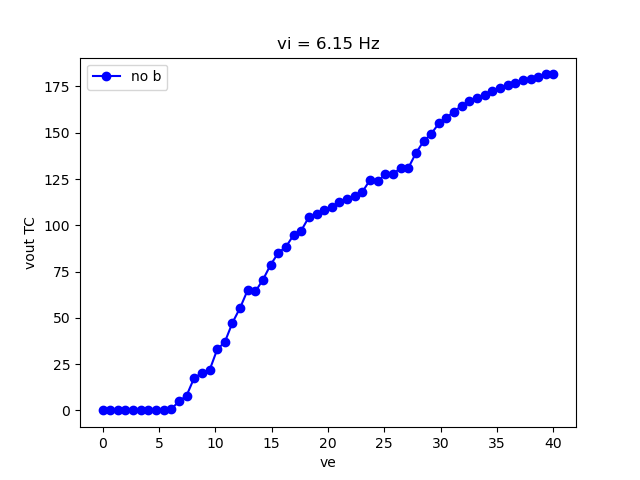

In [4]:
i = 6 # choose inhibitory input
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ve, RS[i], '-ob', label = "no b")
# ax.plot(ve, RS2[i], '-or', label = "b=30")
ax.set_title(f'vi = {vi[i]:.2f} Hz')
ax.set_xlabel('ve')
ax.set_ylabel('vout TC')
plt.legend()
# plt.xlim(8,30)

In [28]:
RS.shape

(40, 60)

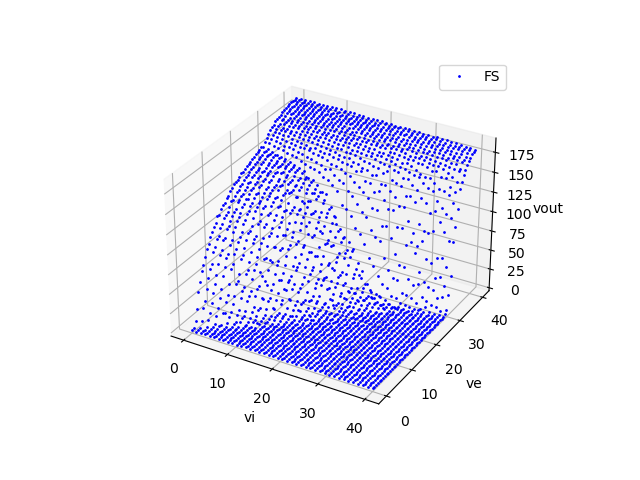

In [5]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
# ax.plot3D(vvi.flatten(), vve.flatten(), RS.flatten(), 'or', markersize=1, label='RS')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

# Add a legend
ax.legend()

# Display the plot
plt.show()

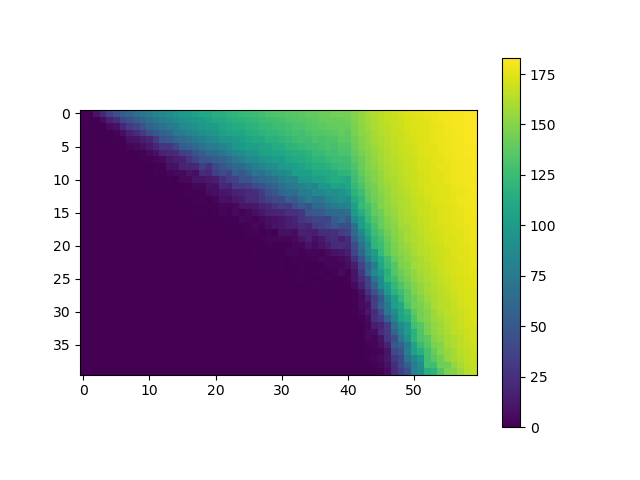

In [7]:
# Create a new figure
fig = plt.figure()

# Create axes for the plot
ax1 = fig.add_subplot(111)

# Plot the image and store the returned mappable object
image = ax1.imshow(RS)

# Add a colorbar using the mappable object
plt.colorbar(image)

# Display the plot
plt.show()

In [4]:
# params = loadparams('thalamus_ACh')
params = loadparams('cortex_updown_maria_def')

In [10]:
params['FS']

{'P': array([-0.05184978,  0.0061593 , -0.01403522,  0.00166511, -0.0020559 ,
         0.00656668,  0.00171829,  0.00318432, -0.04516385, -0.03112775]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.065,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0,
 'b': 0.0,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

In [11]:
params['RS']

{'P': array([-0.05017034,  0.00451531, -0.00794377, -0.00208418, -0.00054697,
         0.00194753,  0.00274079,  0.00341614, -0.01066769, -0.01156433]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.064,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0.0,
 'b': 0.0,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

In [5]:
def MPF(typ,fexc,finh,fout):

    p = params[ typ ]
    P,Nexc,Ninh,Qe,Qi,Cm,El = p.P,p.Nexc,p.Ninh,p.Qe,p.Qi,p.Cm,p.El
    a,b,Tw,Gl,Te,Ti,Ee,Ei = p.a,p.b,p.Tw,p.Gl,p.Te,p.Ti,p.Ee,p.Ei

    fexc[fexc<1e-9]=1e-9
    fe = fexc*Nexc
    finh[finh<1e-9]=1e-9
    fi = finh*Ninh


    muGi = Qi*Ti*fi
    muGe = Qe*Te*fe
    muG = Gl+muGe+muGi
    muV = (muGe*Ee+muGi*Ei+Gl*El - fout*Tw*b + a*El)/(muG+a)
    
    
    muGn = muG/Gl
    Tm = Cm/muG
    
    Ue =  Qe/muG*(Ee-muV)
    Ui = Qi/muG*(Ei-muV)

    sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm))

    Tv = ( fe*(Ue*Te)*(Ue*Te) + fi*(Qi*Ui)*(Qi*Ui)) /( fe*(Ue*Te)*(Ue*Te)/(Te+Tm) + fi*(Qi*Ui)*(Qi*Ui)/(Ti+Tm) )
    TvN = Tv*Gl/Cm

    return muV, sV, Tv, TvN

In [6]:
#====== calculate MPF for TC/RE =======

#-choose here the neuron typ:
typ = 'FS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

Text(0, 0.5, 'muV [mV]')

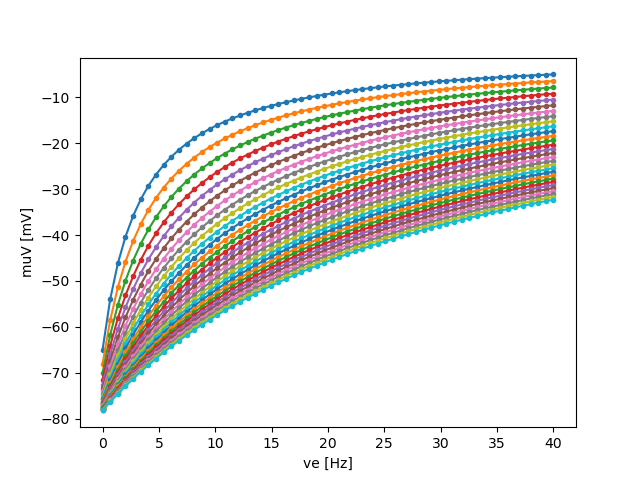

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(30):
    ax.plot(ve, muV[i]*1e3,marker = '.',label=f'vi={vi[i]:.2f}Hz' )

plt.xlabel('ve [Hz]')
plt.ylabel('muV [mV]')
# plt.legend();

In [8]:
def pheV(fout, muV, sV, Tv):
    fout[fout<0]=1e-9
    Tv[Tv<0]=1e-9
    return np.sqrt(2)*sV * erfcinv( 2*Tv*fout ) + muV # Zerlaut 2017
    # return np.sqrt(2)*sV * erfcinv( Tv*fout ) + muV # to widen the definition range

In [31]:
params['RS']

{'P': array([-0.05017034,  0.00451531, -0.00794377, -0.00208418, -0.00054697,
         0.00194753,  0.00274079,  0.00341614, -0.01066769, -0.01156433]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.064,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0.0,
 'b': 0.0,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

In [28]:
FF

array([[  0.        ,   0.        ,   7.22891566, ..., 188.75502008,
        187.95180723, 188.75502008],
       [  0.        ,   0.        ,   0.        , ..., 187.95180723,
        188.75502008, 188.75502008],
       [  0.        ,   0.        ,   0.        , ..., 187.95180723,
        187.95180723, 188.75502008],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 179.91967871,
        181.52610442, 182.32931727],
       [  0.        ,   0.        ,   0.        , ..., 179.91967871,
        181.52610442, 182.32931727],
       [  0.        ,   0.        ,   0.        , ..., 179.11646586,
        180.72289157, 181.52610442]])

In [25]:
muV

array([[-0.065     , -0.05401408, -0.04620482, ..., -0.00516151,
        -0.00507947, -0.005     ],
       [-0.06806122, -0.05857845, -0.05141495, ..., -0.00665489,
        -0.00655119, -0.00645068],
       [-0.07008475, -0.06177893, -0.05523319, ..., -0.00808983,
        -0.0079662 , -0.0078463 ],
       ...,
       [-0.07856968, -0.07707488, -0.0756359 , ..., -0.037317  ,
        -0.0369764 , -0.03664196],
       [-0.07860382, -0.0771434 , -0.07573625, ..., -0.03780697,
        -0.03746582, -0.03713078],
       [-0.07863636, -0.07720877, -0.0758321 , ..., -0.03828582,
        -0.03794424, -0.0376087 ]])

Text(0, 0.5, 'Veff [mV]')

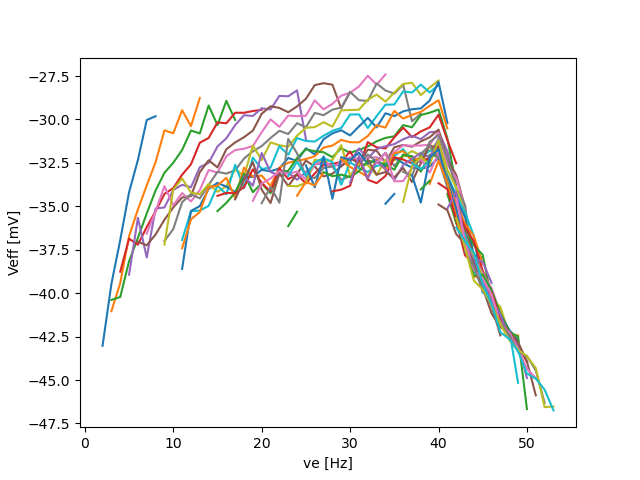

In [9]:
#====== calculate phenomenological V_thr^eff ======
Veff = pheV(FF, muV, sV, Tv)

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(vi)):
    ax.plot( Veff[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('Veff [mV]')
# plt.xlim(0,20)
# plt.ylim(-55,-40)
# plt.legend(loc=(1.2,-1.2));

In [10]:
# Take rid of infs/nans

#Flatten the arrays
ve2 = vve.flatten()
vi2 = vvi.flatten()
FF2 = FF.flatten()

# Keep/Discard what you dont want anymore

# #-------OPTIONAL----------------
# #Keep Fout above 0
# jjindex=np.where(FF2>0.)

# ve2=ve2[jjindex]#,jjindex)
# vi2=vi2[jjindex]
# FF2=FF2[jjindex]

# # Discard ve/vi above certain value
# ijn=np.where(ve2>13)

# ve2=np.delete(ve2,ijn)
# vi2=np.delete(vi2,ijn)
# FF2=np.delete(FF2,ijn)

# Calculate Veff:
muV2, sV2, Tv2, TvN2 = MPF(typ, ve2, vi2, FF2)

Veff = pheV(FF2, muV2, sV2, Tv2)

#delete Nan/Infs
nanindex=np.where(np.isnan(Veff))
infindex=np.where(np.isinf(Veff))

bigindex = np.concatenate([nanindex,infindex],axis=1)

ve2=np.delete(ve2,bigindex)
vi2=np.delete(vi2,bigindex)
FF2=np.delete(FF2,bigindex)
print(ve2.shape)

#Keep the good ones
muV_fit, sV_fit, Tv_fit, TvN_fit = MPF(typ, ve2, vi2, FF2)

Veff_fit = pheV(FF2, muV_fit, sV_fit, Tv_fit)

#check if there are still nans/infs
print(np.isnan(Veff_fit).any())
print(np.isinf(Veff_fit).any())

# # If yes you can do the following:
# nanindex=np.where(np.isnan(Veff_fit))
# infindex=np.where(np.isinf(Veff_fit))

# bigindex = np.concatenate([nanindex,infindex],axis=1)

# ve2=np.delete(ve2,bigindex)
# vi2=np.delete(vi2,bigindex)
# FF2=np.delete(FF2,bigindex)
# print(ve2.shape)

# #Keep the good ones
# muV_fit, sV_fit, Tv_fit, TvN_fit = MPF(typ, ve2, vi2, FF2)

# Veff_fit = pheV(FF2, muV_fit, sV_fit, Tv_fit)

# #check if there are still nans/infs
# print(np.isnan(Veff_fit).any())
# print(np.isinf(Veff_fit).any())

(782,)
False
False


In [106]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='FS': idx = '[8:-21,34:]'
elif typ=='RS': idx = '[15:25,38:-10]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = FS{idx}")
exec(f"RE_fit = RS{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
# exec(f"ve_fit = ve{idx}")
Veff_fit.shape

(10, 12)

False
False


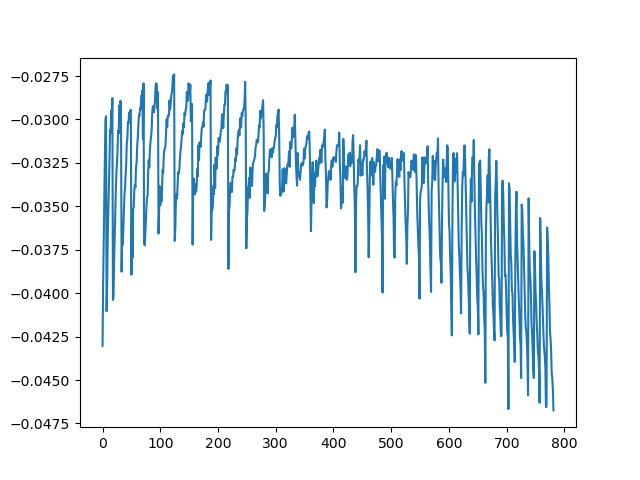

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Veff_fit.T);

print(np.isnan(Veff_fit).any())
print(np.isinf(Veff_fit).any())

In [12]:
# calculating the effective threshold potential with a general second order polynomial of the membrane moments (mu,sigma,tau)

def Vthre(P, muV, sV, TvN):
    # normalizing moments:
    muV0 = -60e-3;
    DmuV0 = 10e-3;
    sV0 = 4e-3;
    DsV0 = 6e-3;
    TvN0 = 0.5;
    DTvN0 = 1.;
    
    # first order polynomial
    Vo1 = P[0] + P[1]*(muV-muV0)/DmuV0 + P[2]*(sV-sV0)/DsV0 + P[3]*(TvN-TvN0)/DTvN0
    # second order polynomial
    Vo2 = P[4]*((muV-muV0)/DmuV0)*((muV-muV0)/DmuV0) + P[5]*(muV-muV0)/DmuV0*(sV-sV0)/DsV0 + P[6]*(muV-muV0)/DmuV0*(TvN-TvN0)/DTvN0 + P[7]*((sV-sV0)/DsV0)*((sV-sV0)/DsV0) + P[8]*(sV-sV0)/DsV0*(TvN-TvN0)/DTvN0  + P[9]*((TvN-TvN0)/DTvN0)*((TvN-TvN0)/DTvN0);

    return Vo1 + Vo2
    

p[0] : should be roughly the vthr of the sp.network (eg should not be positive)
the other ps should be small

In [20]:
Veff_fit.mean()

-0.033903544095924734

In [30]:
P

array([-4.22837638e-02,  3.45701391e-03,  2.23392627e-02, -3.57832209e-03,
        6.55519737e-05, -8.15958204e-04,  2.91822116e-03, -6.50895643e-02,
       -1.13169353e-03,  3.57354041e-02])

In [14]:
# fitting first order Vthr on the phenomenological threshold space

def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P,[0]*6]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-8, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='SLSQP', tol=1e-32, options={'disp':True,'maxiter':20000})

P1 = np.array(res.x)
print(P1)

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 304
         Function evaluations: 514
[-0.04228376  0.00345701  0.02233926 -0.00357832]


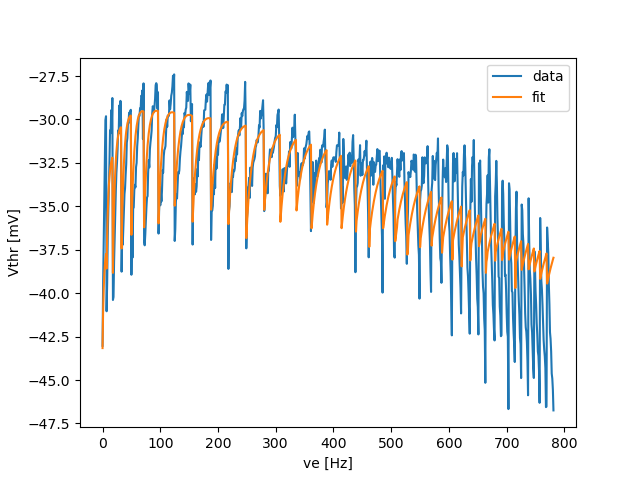

In [15]:
# # checking the fit...

# # choose vi:
# i=8
# fig=plt.figure()
# ax = fig.add_subplot(111)
# # fig.set_title(f'vi = {vi[i]:.2f} Hz')

# ax.plot(Veff_fit[i]*1e3, label='data')
# ax.plot(Vthre(np.concatenate([P1,[0]*6]), muV_fit, sV_fit, TvN_fit)[i]*1e3, label='fit')
# plt.xlabel('ve [Hz]')
# plt.ylabel('Vthr [mV]')
# plt.legend();


# If the Veff_fit is flattened uncomment here:

# checking the fit...

# choose vi:
i=8
fig=plt.figure()
ax = fig.add_subplot(111)
# fig.set_title(f'vi = {vi[i]:.2f} Hz')

ax.plot(Veff_fit*1e3, label='data')
ax.plot(Vthre(np.concatenate([P1,[0]*6]), muV_fit, sV_fit, TvN_fit)*1e3, label='fit')
plt.xlabel('ve [Hz]')
plt.ylabel('Vthr [mV]')
plt.legend();

In [49]:
v_fit_1 = Vthre(np.concatenate([P1,[0]*6]), muV_fit, sV_fit, TvN_fit)*1e3

skippable:



You do the first fit, and then you do the big fit (only using as initial guesses the P found from the 1st order fit).

If the Veff looks linear, probably you dont need the 2nd order fit. If it doesnt work, you can also do the fit for the 2nd order and try again.


In [34]:
P = np.concatenate([P1,[0]*6])

In [17]:
# fit the second order parameters on Vthre ( not necessary most of the time!!!! -> SKIP )
def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P1,P]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [1e-9]*6, method='nelder-mead', tol=1e-15, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [0]*6, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':20000})

P2 = np.array(res.x)
print(P2)

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 1212
         Function evaluations: 2013
[ 6.69483893e-05 -9.46659365e-04  2.96681721e-03 -6.90764770e-02
 -1.10465729e-03  3.62945667e-02]


In [50]:
v_fit_2 = Vthre(np.concatenate([P1,P2]), muV_fit, sV_fit, TvN_fit)*1e3

NameError: name 'v_fit_2' is not defined

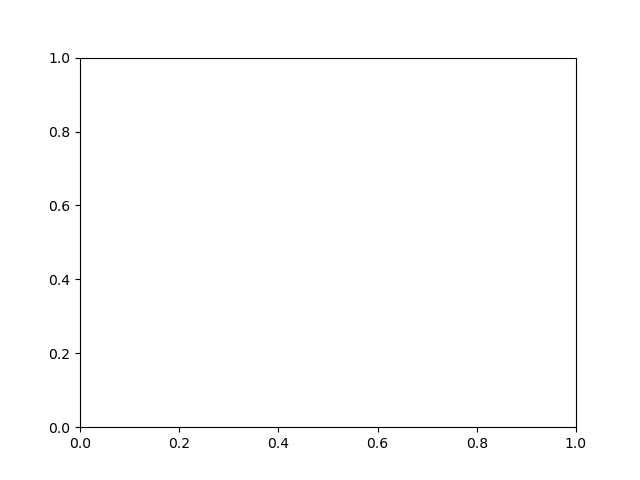

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(v_fit_2, label = 'fit 2')
ax.plot(v_fit_1, label = 'fit 1')
# ax.plot(Veff_fit*1e3, label='data')

ax.legend()
plt.show()

In [19]:
P = np.concatenate([P1,P2])

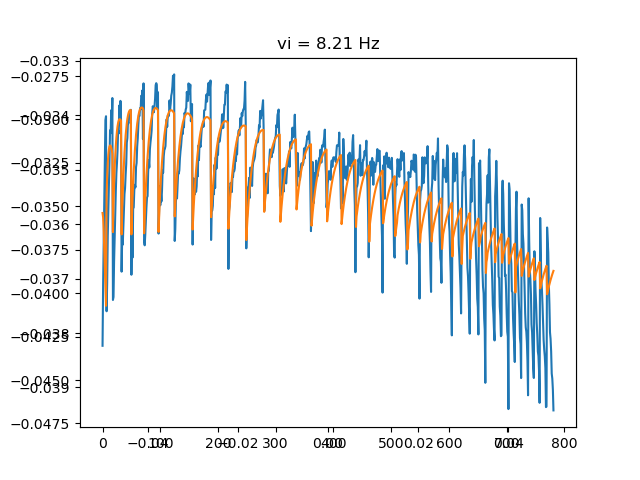

In [29]:
i =8
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111)
ax.set_title(f'vi = {vi[i]:.2f} Hz')

ax.plot(Veff_fit[i])
ax.plot(Vthre(P, muV_fit, sV_fit, TvN_fit)[i])

# If Veff_fit is flattened:

# Create axes for the 3D plot
ax = fig.add_subplot(111)
# ax.set_title(f'vi = {vi2:.2f} Hz')

ax.plot(Veff_fit)
ax.plot(Vthre(P, muV_fit, sV_fit, TvN_fit))

In [459]:
FF[:,red].shape

(40, 19)

In [471]:
FF.shape

(40, 60)

In [472]:
ve[red].shape

(21,)

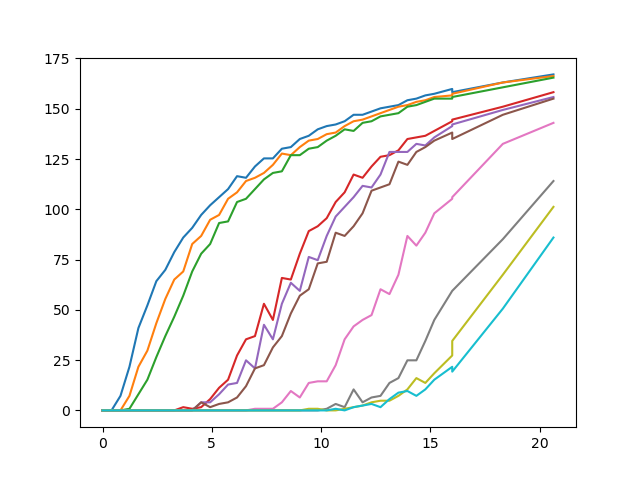

In [242]:
# choose a subspace to fit the firing rate and transfer function ( not necessary BUT produces better results most of the time )
# IMPPORTANT if a subspace in firing rate input is more interesting or badly fitted without doing this ...

red = [0,5,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,30,39]
red = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

red = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42]

# rid = [0,20,30,35,36,37,38,39]
rid = [0,1,2,8,9,10,15,20,22,23]
# rid = [0,1,2,3,4,5,6,7,8,9]
# rid = [0,1,2,3,9,10,20,29]

fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(ve,FF[rid].T);
ax.plot(ve[red],FF[rid][:,red].T);
# ax.plot(ve[red],FF[:,red].T);

In [117]:
vi[23]

35.38461538461539

In [20]:
# the transfer function
def TF(P, muV, sV, Tv, TvN):
    fout = 1/(2*Tv) * erfc( (Vthre(P, muV, sV, TvN) - muV)/(np.sqrt(2)*sV) )
    
    # fout = np.where(fout<0, 1e-9, fout)
    fout[fout<0]=0
    return fout

In [196]:
muV.shape

(2400,)

In [21]:
def Res(P):
#     return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (FF - TF(P, muV, sV, Tv, TvN))**2 )
#     return np.mean( (FF[rid] - TF(P, muV[rid], sV[rid], Tv[rid], TvN[rid]))**2 )
#     return np.mean( (FF[:,red] - TF(P, muV[:,red], sV[:,red], Tv[:,red], TvN[:,red]))**2 )
    return np.mean( (FF[rid][:,red] - TF(P, muV[rid][:,red], sV[rid][:,red], Tv[rid][:,red], TvN[rid][:,red]))**2 )

res = minimize(Res, P, method='nelder-mead', tol=1e-15, options={'disp':True,'maxiter':40000})
# res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':30000})
# res = minimize(Res, P, method='SLSQP', options={'ftol':1e-30,'disp':True,'maxiter':40000})

PP = np.array(res.x)
print(PP)

[ 0.06450337 -0.05221765 -0.16561169  0.24683003  0.00673266  0.05164758
 -0.09648848 -0.86490046 -0.03921579 -0.23932787]


/tmp/ipykernel_857969/1361955116.py:8: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, P, method='nelder-mead', tol=1e-15, options={'disp':True,'maxiter':40000})


In [56]:
P = np.concatenate([P1, [0]*6])

In [60]:
PP = np.array(res.x)


In [59]:
def Res(P):
#     return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (FF - TF(P, muV, sV, Tv, TvN))**2 )

res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
PP = np.array(res.x)


/tmp/ipykernel_854072/2603286329.py:5: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})


In [70]:
vi

array([ 0.        ,  1.02564103,  2.05128205,  3.07692308,  4.1025641 ,
        5.12820513,  6.15384615,  7.17948718,  8.20512821,  9.23076923,
       10.25641026, 11.28205128, 12.30769231, 13.33333333, 14.35897436,
       15.38461538, 16.41025641, 17.43589744, 18.46153846, 19.48717949,
       20.51282051, 21.53846154, 22.56410256, 23.58974359, 24.61538462,
       25.64102564, 26.66666667, 27.69230769, 28.71794872, 29.74358974,
       30.76923077, 31.79487179, 32.82051282, 33.84615385, 34.87179487,
       35.8974359 , 36.92307692, 37.94871795, 38.97435897, 40.        ])

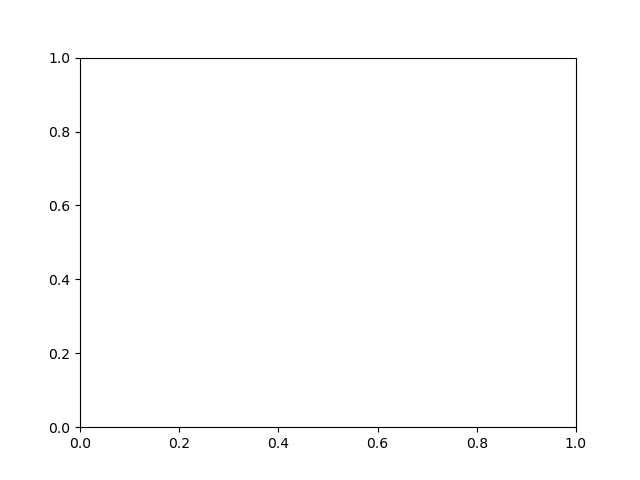

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
from matplotlib.animation import FuncAnimation
from ipywidgets import Button, HBox

# Assuming vi and other necessary variables are defined elsewhere

# Define the function to update the plot for each frame
def update(frame):
    ax_anim.clear()
    i = frame  # iterate over different values of i
    ax_anim.set_title(f'vi = {vi[i]:.2f}Hz')
    ax_anim.plot(ve, FF[i], 'o', ms=3, label='data')
    ax_anim.plot(ve, TF(PP, muV, sV, Tv, TvN)[i], label='fit')
    ax_anim.set_xlabel('ve [Hz]')
    ax_anim.set_ylabel('vout [Hz]')
    plt.legend()

# Create a figure and axis
fig_anim, ax_anim = plt.subplots()

# Set any initial settings for the plot (if needed)

# Create the animation
ani = FuncAnimation(fig_anim, update, frames=len(vi), interval=200,repeat=False)

def stop_animation(event):
    ani.event_source.stop()

# Create a stop button
stop_button = Button(description='Stop Animation')
stop_button.on_click(stop_animation)

# Display the stop button
display(HBox([stop_button]))

# If you want to save the animation to a file, uncomment the following line
# ani.save('animation.mp4', writer='ffmpeg')

# Show the plot
plt.show()

In [82]:
plt.clf()

In [ ]:
# compare fit

# choose vi...
i =10

print(f'vi = {vi[i]:.2f}Hz')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f'vi = {vi[i]:.2f}Hz')

ax.plot(ve,FF[i], 'o', ms=3, label='data')
ax.plot(ve,TF(PP, muV, sV, Tv, TvN)[i], label='fit')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('vout [Hz]')
# plt.xlim(0,20)
# plt.ylim(0,50)
plt.legend();

In [227]:
typ

'RS'

In [228]:
#===== SAVE fitted parameters ======

np.save(f'./data/FITparams_default_{typ}.npy', PP)
np.save(f'/DATA/Maria/fede_tau/input_current/FITparams_default_{typ}.npy', PP)

In [86]:
plt.close(fig)

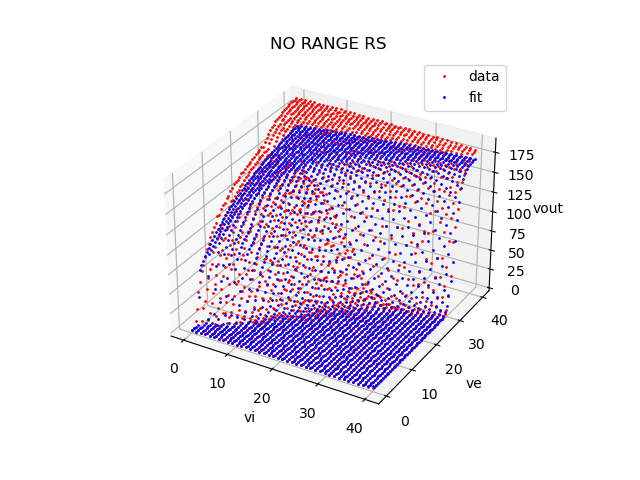

In [87]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
ax.plot3D(vvi.flatten(), vve.flatten(), FF.flatten(), 'or', markersize=1, label='data')
ax.plot3D(vvi.flatten(), vve.flatten(), TF(PP, muV, sV, Tv, TvN).flatten(), 'ob', markersize=1, label='fit')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

ax.set_title("NO RANGE RS")

# Add a legend
ax.legend()

# Display the plot
plt.show()